# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [68]:
# Initial imports
import os
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
from newsapi import NewsApiClient
%matplotlib inline



import nltk
nltk.download('reuters')
nltk.download('punkt')
nltk.download('stopwords')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()



[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Ashley\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ashley\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashley\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
# Read your api key environment variable
# YOUR CODE HERE!
env_path = Path('/Users/Ashley/Documents/Python Scripts') / '.env'
load_dotenv(env_path)
api_key = os.getenv("NEWS_API_KEY")

In [70]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [129]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en")

In [130]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en")

In [131]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    

bitcoin_df = pd.DataFrame(bitcoin_sentiments)

In [132]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    

ethereum_df = pd.DataFrame(ethereum_sentiments)

In [133]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.192360,0.06285,0.011000,0.926200
std,0.263317,0.06882,0.029563,0.069839
min,-0.241100,0.00000,0.000000,0.781000
25%,0.000000,0.00000,0.000000,0.882750
50%,0.107950,0.04900,0.000000,0.924500
75%,0.369700,0.10000,0.000000,1.000000
max,0.726900,0.21900,0.116000,1.000000


In [134]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.143395,0.036200,0.007100,0.956700
std,0.293811,0.063669,0.023092,0.074001
min,-0.226300,0.000000,0.000000,0.792000
25%,0.000000,0.000000,0.000000,0.925000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.119175,0.071250,0.000000,1.000000
max,0.822500,0.208000,0.094000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [135]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [136]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
nltk.download('stopwords')
sw = stopwords.words("english")

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw.append("seen")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashley\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [137]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    text_clean = regex.sub(' ', text)    
   
    # Create a tokenized list of the words
    words = word_tokenize(text_clean)
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase    
    words = [word.lower() for word in words]
    
    # Remove the stop words
    words = [word for word in words if word not in sw]    
    
    return tokens

In [138]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)

In [139]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [140]:
from collections import Counter
from nltk import ngrams

In [141]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_text = ' '.join(bitcoin_df['text'])
bitcoin_tokenized = tokenizer(bitcoin_text)
bitcoin_tokenized = [word.lower() for word in bitcoin_tokenized if word.lower() not in sw]
bigrams = ngrams(bitcoin_tokenized, n=2)
Counter(bigrams).most_common(20)

[(('http', 'ift'), 6),
 (('ift', 'tt'), 6),
 (('reuters', 'bitcoin'), 5),
 (('char', 'representation'), 4),
 (('cryptocurrency', 'bitcoin'), 4),
 (('illustration', 'taken'), 4),
 (('oct', 'reuters'), 4),
 (('u', 'today'), 3),
 (('today', 'http'), 3),
 (('tt', 'ea'), 3),
 (('ea', 'v'), 3),
 (('v', 'j'), 3),
 (('representation', 'virtual'), 3),
 (('virtual', 'cryptocurrency'), 3),
 (('bitcoin', 'picture'), 3),
 (('picture', 'illustration'), 3),
 (('taken', 'october'), 3),
 (('october', 'reuters'), 3),
 (('reuters', 'edgar'), 3),
 (('li', 'bitcoin'), 2)]

In [142]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_text = ' '.join(ethereum_df['text'])
ethereum_tokenized = tokenizer(ethereum_text)
ethereum_tokenized = [word.lower() for word in ethereum_tokenized if word.lower() not in sw]
bigrams = ngrams(ethereum_tokenized, n=2)
Counter(bigrams).most_common(20)

[(('illustration', 'taken'), 6),
 (('getty', 'images'), 4),
 (('taken', 'june'), 4),
 (('june', 'reuters'), 4),
 (('reuters', 'dado'), 4),
 (('dado', 'ruvic'), 4),
 (('reuters', 'bitcoin'), 4),
 (('char', 'representation'), 4),
 (('bitcoin', 'ethereum'), 3),
 (('representation', 'virtual'), 3),
 (('ruvic', 'illustration'), 3),
 (('illustration', 'file'), 3),
 (('char', 'nft'), 3),
 (('cross', 'chain'), 2),
 (('chain', 'bridge'), 2),
 (('file', 'photo'), 2),
 (('cryptocurrency', 'exchange'), 2),
 (('char', 'representations'), 2),
 (('representations', 'cryptocurrencies'), 2),
 (('cryptocurrencies', 'bitcoin'), 2)]

In [143]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [144]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(bitcoin_tokenized, N=10)

[('bitcoin', 21),
 ('char', 16),
 ('reuters', 11),
 ('u', 7),
 ('li', 6),
 ('http', 6),
 ('ift', 6),
 ('tt', 6),
 ('cryptocurrency', 6),
 ('exchange', 5)]

In [145]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(ethereum_tokenized, N=10)

[('char', 20),
 ('bitcoin', 13),
 ('reuters', 12),
 ('ethereum', 10),
 ('cryptocurrency', 9),
 ('illustration', 9),
 ('nfts', 6),
 ('taken', 6),
 ('ha', 5),
 ('nft', 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [146]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

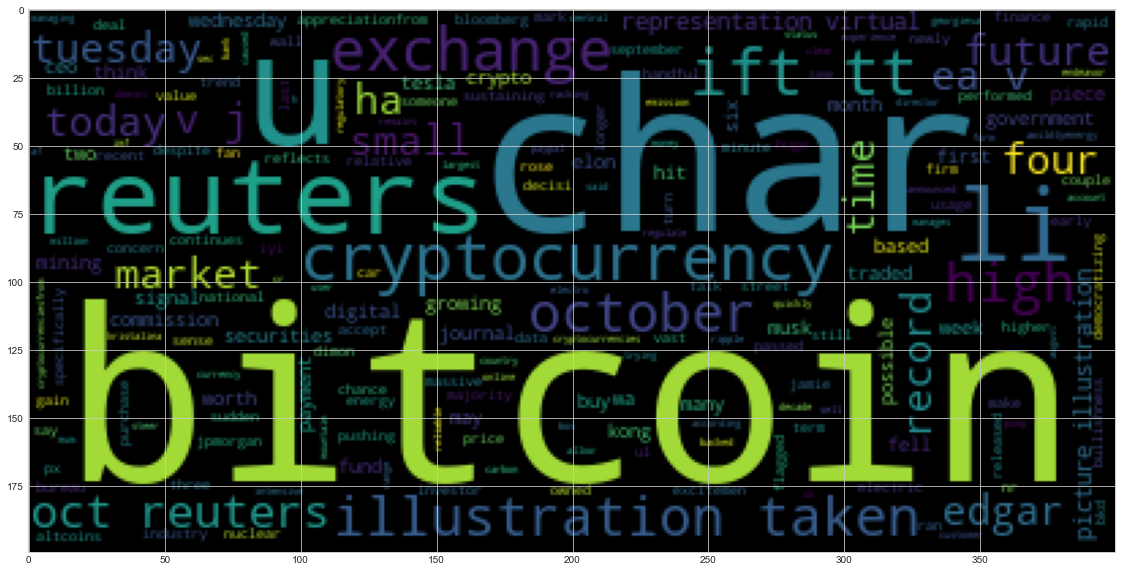

In [147]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
big_string = ' '.join(bitcoin_tokenized)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

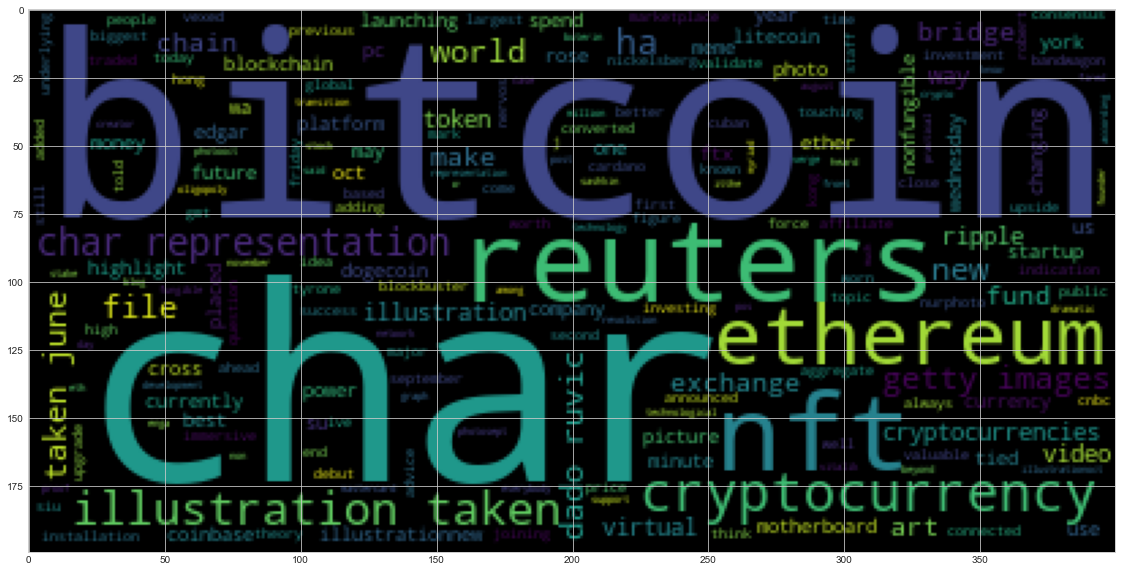

In [148]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
big_string = ' '.join(ethereum_tokenized)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [150]:
import spacy
from spacy import displacy

In [151]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [154]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [155]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_text

'<ul><li>Bitcoin, in terms of market value, rose 4.6% to $53,859.6.</li><li>It passed $50,000 mark for first time in four weeks on Tuesday.\xa0</li><li>Bitcoin fell below $50,000 in early September.</li>… [+821 chars] JPMorgan CEO Jamie Dimon is still not a Bitcoin fan despite rapid price appreciationfrom U.Today https://ift.tt/3iyi5nR https://ift.tt/eA8V8J How high are the chances of Bitcoin sustaining its gains and pushing altcoins higher?from U.Today https://ift.tt/3BkD5px https://ift.tt/eA8V8J Elon Musk has performed a sudden U-turn on bitcoin over concerns about its energy usage, and says his electric car firm Tesla will no longer accept the cryptocurrency as payment – but will his decisi… [+3069 chars] Specifically, why did someone make a massive purchase of $1.6 billion worth of bitcoin on Wednesday in a couple of minutes?\r\nWhile many see this huge buy as a signal of bullishness, there may be more… [+8443 chars] Last week, the Wall Street Journal ran a piece on three recent nu

In [156]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
# YOUR CODE HERE!
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [157]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_doc, style='ent')

In [158]:
# List all Entities
# YOUR CODE HERE!
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

4.6% PERCENT
53,859.6.</li><li MONEY
50,000 MONEY
first ORDINAL
four weeks DATE
Tuesday DATE
50,000 MONEY
JPMorgan ORG
Jamie Dimon PERSON
https://ift.tt/eA8V8J Elon Musk PERSON
Tesla PERSON
$1.6 billion MONEY
Wednesday DATE
a couple of minutes TIME
Last week DATE
the Wall Street Journal ORG
three CARDINAL
Journal ORG
Bitcoin ORG
Bloomberg ORG
the National Bureau ORG
electro GPE
two decades DATE
403 million CARDINAL
23 August DATE
UK GPE
four CARDINAL
SEC ORG
two CARDINAL
Digital ORG
IMF ORG
Kristalina Georgieva PERSON
Elon Musk PERSON
Tuesday DATE
U.S. GPE
Canada GPE
Bitcoin NORP
Alberta GPE
Link Global PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationHONG KONG ORG
Oct 21 DATE
Reuters ORG
October 19, 2021 DATE
REUTERS ORG
Edgar SuLONDON PERSON
Oct 20 DATE
Reuters ORG
Securities and Exchange Commission ORG
Andrew Kelly PERSON
The US Securities and Exchange Commission ORG
as many as four CARDINAL
October DATE
October 18, 2021 DATE
REUTERS ORG
Edgar SuSINGAPORE PERSON
Oct 19 D

---

### Ethereum NER

In [159]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_text

"A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.\r\nNervos\xa0today announced that the Force Bridge is … [+3114 chars] Mark Cuban has some advice for people who are new to investing in cryptocurrency.\r\nAs an investment, I think ethereum has the most upside, he told CNBC Make It Wednesday. Bitcoin, he added, is better… [+1139 chars] An immersive art installation, which will be converted into NFTs in Hong Kong, September 30, 2021.\r\nREUTERS/Tyrone Siu/File Photo\r\nFTX.US, an affiliate of cryptocurrency exchange FTX, is launching an… [+2138 chars] Coinbase NFT\r\nRobert Nickelsberg/Getty Images\r\nCoinbase Global is joining the NFT bandwagon by launching its own marketplace by the end of the year.\r\nThe largest cryptocurrency exchange in the US on … [+2112 chars] Bitcoin and Ethereum.\r\nNurPhoto / Getty Images\r\nIf the blockbuster success of the first-ever bitcoin-futures exchange-

In [160]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
# YOUR CODE HERE!
ethereum_doc.user_data["title"] = "Ethereum NER"

In [161]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum_doc, style='ent')

In [162]:
# List all Entities
# YOUR CODE HERE!
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

Ethereum PERSON
Cardano PERSON
Nervos  PERSON
today DATE
the Force Bridge FAC
Mark Cuban PERSON
CNBC ORG
Wednesday DATE
Hong Kong GPE
September 30, 2021 DATE
FTX ORG
NFT ORG
Robert Nickelsberg PERSON
Getty Images ORG
Coinbase Global PERSON
NFT ORG
the end of the year DATE
US GPE
NurPhoto PERSON
first ORDINAL
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Oct PERSON
second ORDINAL
Reuters ORG
1 CARDINAL
Reuters ORG
9.46% PERCENT
47,980.97 MONEY
20:12 GMT TIME
Friday DATE
4,146.54 MONEY
June 14, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationOct PERSON
Reuters ORG
7.11% PERCENT
55,162.92 MONEY
20 CARDINAL
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration/File PhotoOct ORG
Reuters ORG
5 CARDINAL
August 6, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File ORG
30 CARDINAL
Reuters ORG
5.23% PERCENT
43,716.97 MONEY
22 CARDINAL
NFT ORG
Getty Images PERSON
the minute TIME
Vitalik Buterin PERSON
One year from now DATE
Ethereum PERSON
NFT ORG
Getty Images PERSON
the minute TIME
June 29, 2

---